<a href="https://colab.research.google.com/github/estebanmaestria0/DINAMICAESTRUCTURAL/blob/main/Copia_de_Identificar_Distribucion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as math
from scipy import stats
import numbers

# ver nombre de la distribucion en https://docs.scipy.org/doc/scipy/reference/stats.html y cambiar en los lugares donde dice norm
from scipy.stats import norm

In [ ]:
!pip install gspread
!pip install oauth2client

import gspread
from oauth2client.service_account import ServiceAccountCredentials

In [ ]:
# Dsitribucion a probar
distribucion = stats.norm
distribucion.name=norm

In [ ]:
# Datos
# URL del archivo de Google Sheets
url = 'https://docs.google.com/spreadsheets/d/1-zcMPBWvmWgxyKiRNbY1yCzCRNvcRv49/edit?usp=sharing'
url = url.replace('/edit?usp=sharing', '/export?format=csv')

# Paso 3: Cargar la hoja de cálculo
# Cargar los datos en un DataFrame de Pandas
df = pd.read_csv(url, header=None, decimal=',')

# Paso 4: Convertir la columna de interés a un array de NumPy para análisis
values = df.iloc[:, 0].values  # Asumiendo que la columna de interés es la primera

In [ ]:
# Datos
Excel = values
print('Tabla de Excel:')
print(Excel)
print(' ')

Datos_Totales = values  # Obtener la columna deseada

Tabla de Excel:
[359.95 251.29 249.63 205.98 274.9  289.68 326.63 301.37 294.68 277.61
 320.21 284.38 213.35 216.93 225.89 290.01 336.03 319.89 360.41 276.93
 293.03 317.47 261.4  235.57 260.63 311.75 319.47 296.89 309.8  226.62
 174.18 316.68 345.7  158.14 263.54 271.2  291.85 191.97 342.76 281.
 295.85 265.23 318.6  210.3  230.05 226.43 259.32 259.23 300.95 191.03
 266.51 197.5  297.52 310.9  268.01 220.2  263.34 250.6  312.99 279.03
 253.78 244.13 278.36 188.69 239.68 298.82 348.05 277.91 385.   297.13
 313.31 264.68 237.61 289.27 265.45 203.4  216.62 316.5  264.58 340.96
 338.3  269.08 235.74 301.14 257.87 265.12 247.12 236.6  273.95 247.58
 286.69 312.67 291.58 310.02 214.68 294.42 247.29 302.67 338.54 234.01
 192.07 242.37 281.31 222.89 197.19 267.27 277.31 286.77 281.66 272.42
 308.22 251.17 323.75 256.57 201.79 380.25 282.58 268.09 288.44 261.77
 347.65 269.13 214.01 273.52 277.28 322.8  249.54 229.69 217.27 262.96
 258.84 156.86 293.02 295.73 281.1  258.87 186.96 318.3  283.05

Número de intervalos sugeridos: 15.684387141358123
 


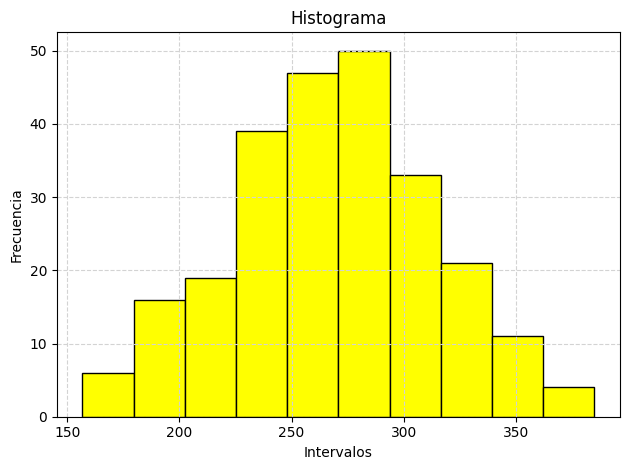

Test de normalidad
Por ejemplo para 95% de nivel de significancia si los valores resultantes son menores que pvalue =1-95/100 = 0.05 se puede rechazar Ho
S-W 0.7954540845552189
J-B 0.8044274095383614
ji2 0.9817504657587187
K-S 0.0
 
Parámetros de la distribución
(267.98252032520315, 45.164019550308446)


<ipython-input-6-269f2d167852>:169: DeprecationWarning: the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  qqplot(x, y, c='r', alpha=1.0, edgecolor='k')


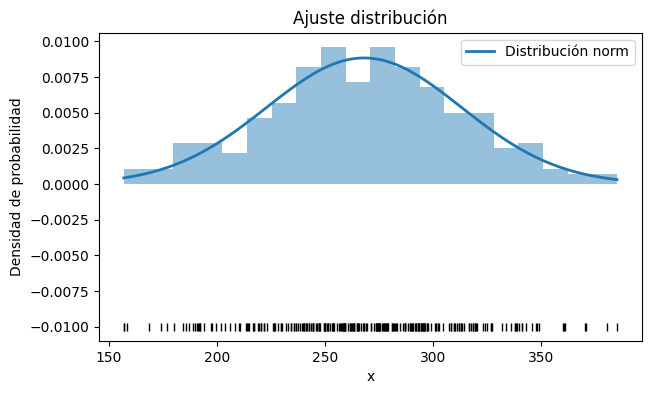

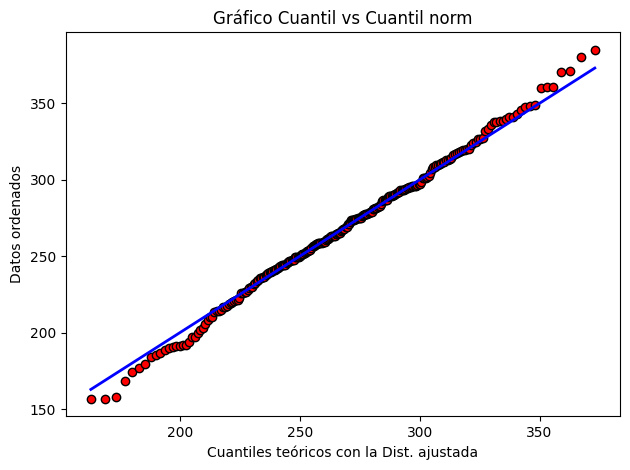

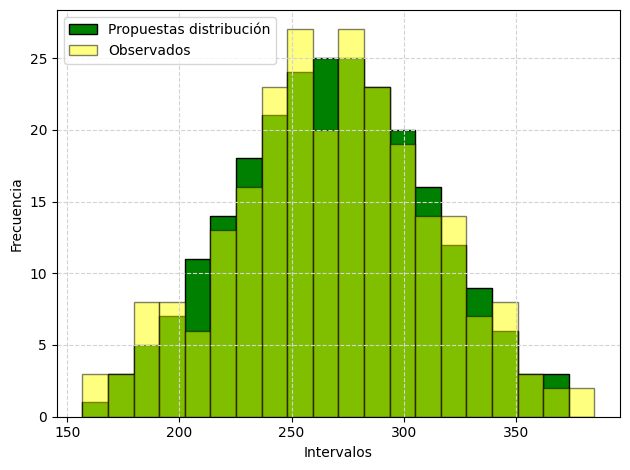

 
...........................................
Prueba de bondad de ajustes
 
Valores esperados
[ 1  3  5  7 11 14 18 21 24 25 25 23 20 16 12  9  6  3  3  0]
Valores observados
[ 3  3  8  8  6 13 16 23 27 20 27 23 19 14 14  7  8  3  2  2]


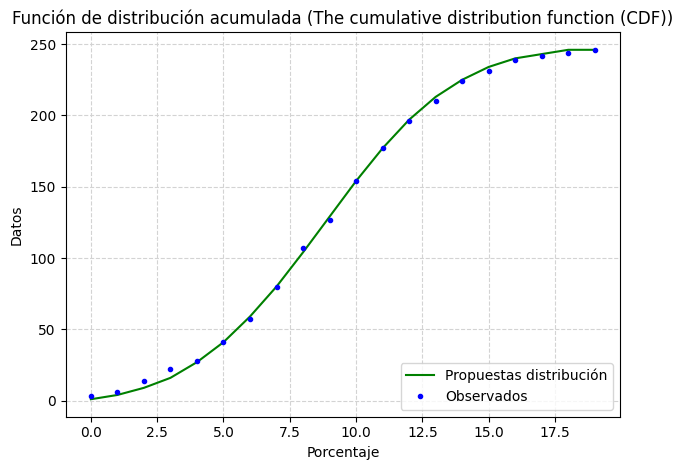

Valores esperados modificados
[ 1  3  5  7 11 14 18 21 24 25 25 23 20 16 12  9  6  3  3]
Valores observados modificados
[ 3  3  8  8  6 13 16 23 27 20 27 23 19 14 14  7  8  3  2]
 
Estadistico de chi2
12.312489177489178
 
Valores criticos
28.869299430392623
p value
0.8306914766766131
 
Conclusion:
No se rechaza la hipótesis nula Ho
Existe respaldo estadistico para decir que:
la distribución propuesta se ajusta con la distribución de los datos.


In [ ]:
#Filtrar los valores diferentes de cero
#Datos2 = Datos_Totales[Datos_Totales != 0]

# Calcular el logaritmo de los datos filtrados
#Datos = np.log(Datos2)

Datos = Datos_Totales
# Grafica
num=len(Datos)
bins_C=math.sqrt(num)
print('Número de intervalos sugeridos:', bins_C)
bins_utilizados=10
print(' ')

plt.figure()
plt.hist(Datos,bins_utilizados,color="yellow", ec="black")
plt.title("Histograma")
plt.xlabel("Intervalos")
plt.ylabel("Frecuencia")
plt.grid(color='lightgray',linestyle='--')
plt.tight_layout()
plt.show()


print('Test de normalidad')
print('Por ejemplo para 95% de nivel de significancia si los valores resultantes son menores que pvalue =1-95/100 = 0.05 se puede rechazar Ho')
print("S-W", stats.shapiro(Datos)[1])
print("J-B", stats.jarque_bera(Datos)[1])
media=Datos.mean()
desv_est=Datos.std()
qq=np.linspace(0,1,10)
xx=stats.norm.ppf(qq,loc=media, scale=desv_est)
f_obs=np.histogram(Datos, xx)
print("ji2", stats.chisquare(f_obs[0])[1])
print("K-S", stats.ks_1samp(Datos, cdf = stats.norm.cdf)[1])


#######################################################################
# FUNCIONES PARA GRAFICAR Q-Q PLOT DESDE LOS DATOS X, Y
#######################################################################
## Funcion QQ
# https://stats.stackexchange.com/questions/403652/two-sample-quantile-quantile-plot-in-python
def qqplot(x, y, quantiles=None, interpolation='nearest', ax=None, rug=False,
           rug_length=0.05, rug_kwargs=None, **kwargs):
    """Draw a quantile-quantile plot for `x` versus `y`.

    Parameters
    ----------
    x, y : array-like
        One-dimensional numeric arrays.

    ax : matplotlib.axes.Axes, optional
        Axes on which to plot. If not provided, the current axes will be used.

    quantiles : int or array-like, optional
        Quantiles to include in the plot. This can be an array of quantiles, in
        which case only the specified quantiles of `x` and `y` will be plotted.
        If this is an int `n`, then the quantiles will be `n` evenly spaced
        points between 0 and 1. If this is None, then `min(len(x), len(y))`
        evenly spaced quantiles between 0 and 1 will be computed.

    interpolation : {‘linear’, ‘lower’, ‘higher’, ‘midpoint’, ‘nearest’}
        Specify the interpolation method used to find quantiles when `quantiles`
        is an int or None. See the documentation for numpy.quantile().

    rug : bool, optional
        If True, draw a rug plot representing both samples on the horizontal and
        vertical axes. If False, no rug plot is drawn.

    rug_length : float in [0, 1], optional
        Specifies the length of the rug plot lines as a fraction of the total
        vertical or horizontal length.

    rug_kwargs : dict of keyword arguments
        Keyword arguments to pass to matplotlib.axes.Axes.axvline() and
        matplotlib.axes.Axes.axhline() when drawing rug plots.

    kwargs : dict of keyword arguments
        Keyword arguments to pass to matplotlib.axes.Axes.scatter() when drawing
        the q-q plot.
    """
    # Get current axes if none are provided
    if ax is None:
        ax = plt.gca()

    if quantiles is None:
        quantiles = min(len(x), len(y))

    # Compute quantiles of the two samples
    if isinstance(quantiles, numbers.Integral):
        quantiles = np.linspace(start=0, stop=1, num=int(quantiles))
    else:
        quantiles = np.atleast_1d(np.sort(quantiles))
    x_quantiles = np.quantile(x, quantiles, interpolation=interpolation)
    y_quantiles = np.quantile(y, quantiles, interpolation=interpolation)

    # Draw the rug plots if requested
    if rug:
        # Default rug plot settings
        rug_x_params = dict(ymin=0, ymax=rug_length, c='gray', alpha=0.5)
        rug_y_params = dict(xmin=0, xmax=rug_length, c='gray', alpha=0.5)

        # Override default setting by any user-specified settings
        if rug_kwargs is not None:
            rug_x_params.update(rug_kwargs)
            rug_y_params.update(rug_kwargs)

        # Draw the rug plots
        for point in x:
            ax.axvline(point, **rug_x_params)
        for point in y:
            ax.axhline(point, **rug_y_params)

    # Draw the q-q plot
    ax.scatter(x_quantiles, y_quantiles, **kwargs)
    # Dibujar linea azul (modificado por Brian Cagua)
    ax.plot(x, x, color = 'blue', linewidth = 2)
'''
 Ajuste y selección de distribuciones con Python by
Joaquín Amat Rodrigo, available under a Attribution
4.0 International (CC BY 4.0) at
https://www.cienciadedatos.net/documentos/pystats01-ajuste-distribuciones-python.html
'''
#######################################################################
# HASTA ESTA LÍNEA SON FUNCIONES (NO MODIFICAR NADA)
#######################################################################

#######################################################################
# GENERAR VALORES CON UNA DISTRIBUCIÓN Y PARÁMETROS DADOS
#######################################################################
# Datos observados
# y=Datos.to_numpy()
y=Datos
y=y.flatten() # Matriz de una dimension

# Generar valores con la distribucion escogida (depende del usuario)
parametros= distribucion.fit(y)
# ver en cada distribucion a que corresponde cada parametro https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

print(' ')
print("Parámetros de la distribución")
print(parametros)
xyz = np.linspace(0.01,.99, num)
x= norm.ppf(xyz,*parametros)
#######################################################################

bins_propuesta=20
rango_inf=min(min(x),min(y))
rango_sup=max(max(x),max(y))
count1, bins = np.histogram(x, bins = bins_propuesta,range=(rango_inf,rango_sup)) # count1 = esperado
count2, bins2 = np.histogram(y, bins = bins) # count2 = observado

# Graficar: curva de densidad de una distribución con el
# histograma de los datos.
x1=Datos;
x_hat = np.linspace(min(Datos), max(Datos), num=100)
y_hat = distribucion.pdf(x_hat, *parametros)
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label=distribucion.name)
ax.hist(x=Datos, density=True, bins=bins_propuesta, color="#3182bd", alpha=0.5);
ax.plot(x1, np.full_like(x1, -0.01), '|k', markeredgewidth=1)
ax.set_title('Ajuste distribución')
ax.set_xlabel('x')
ax.set_ylabel('Densidad de probabilidad')
ax.legend(['Distribución norm']);

## Gráfico de cuantiles-cuantiles
plt.figure()
qqplot(x, y, c='r', alpha=1.0, edgecolor='k')
plt.ylabel('Datos ordenados')
plt.xlabel('Cuantiles teóricos con la Dist. ajustada')
plt.title('Gráfico Cuantil vs Cuantil norm')
plt.tight_layout()
plt.show()


## Gráfico de histogramas
plt.figure()

plt.hist(x,bins,color="green", ec="black",alpha=1)
plt.hist(y,bins,color="yellow", ec="black",alpha=.5)
plt.xlabel("Intervalos")
plt.ylabel("Frecuencia")
plt.grid(color='lightgray',linestyle='--')
plt.legend(["Propuestas distribución","Observados"], loc ="upper left")
plt.tight_layout()
plt.show()


#######################################################################
# PRUEBA DE BONDAD DE AJUSTE
#######################################################################
print(' ')
print('...........................................')
print('Prueba de bondad de ajustes')
print(' ')
print('Valores esperados')
print(count1)
print('Valores observados')
print(count2)

# Realizar la prueba de bondad de ajuste de chi-cuadrado
# Hipótesis nula: Los datos siguen la distribución "de análisis = norm"
# Hipótesis alternativa: Los datos no siguen la distribución "de análisis = norm"
plt.figure()
plt.plot(np.cumsum(count1), 'g-')
plt.plot(np.cumsum(count2), 'b.')
plt.legend(["Propuestas distribución","Observados"], loc ="lower right")
plt.title("Función de distribución acumulada (The cumulative distribution function (CDF))")
plt.grid(color='lightgray',linestyle='--')
plt.xlabel("Porcentaje")
plt.ylabel("Datos")
plt.tight_layout()
plt.show()

# Modificar bins
count1=count1
count2=count2

# Identificar posiciones con valores diferentes de cero
posiciones_no_cero = (count1 != 0) & (count2 != 0)

# Eliminar valores diferentes de cero de ambos vectores
count1 = count1[posiciones_no_cero]
count2 = count2[posiciones_no_cero]

bins_propuesta=len(count1)

print('Valores esperados modificados')
print(count1)
print('Valores observados modificados')
print(count2)
print(' ')

# Prueba de Chi cuadrado
sum=0
for i in range (0,bins_propuesta):
    #Frecuencias en esperado y observado count
    valor=((count2[i]-count1[i])**2)/count1[i]
    sum=sum+valor
chi_squared_stat=sum
print("Estadistico de chi2")
print(chi_squared_stat)
print(' ')

# Valores criticos
# Cuando se prueba distribuciones solo se verifica que tan desviado estan los valores
# por lo tanto solo se prueba con chi2 y una cola
print("Valores criticos")
crit2=stats.chi2.ppf(q=0.95, df=bins_propuesta-1)
print(crit2)

p_value=1-stats.chi2.cdf(x=chi_squared_stat, df=bins_propuesta-1)
print("p value")
print(p_value)
print(' ')


print('Conclusion:')
if chi_squared_stat>crit2:
    print('Rechazar la hipótesis nula Ho')
    print("Existe respaldo estadistico para decir que:")
    print('la distribución propuesta no se ajusta con la distribución de los datos.')
else:
    print('No se rechaza la hipótesis nula Ho')
    print("Existe respaldo estadistico para decir que:")
    print('la distribución propuesta se ajusta con la distribución de los datos.')
